In [1]:
# import libraries
import numpy as np
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
import urllib2
from sklearn.linear_model import LinearRegression as Lin_Reg
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import sklearn.preprocessing as Preprocessing
import itertools as it
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
import unicodedata
import subprocess
import ast
%matplotlib inline

In [2]:
movie_df = pd.read_csv('movie_df.csv', sep = ',')

In [3]:
movie_df.head(5)

,Unnamed: 0,adult,genre_ids,id,orig_lang,orig_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,0,False,"[18, 10752]",600,en,Full Metal Jacket,A pragmatic U.S. Marine observes the dehumaniz...,4.390880,/29veIwD38rVL2qY74emXQw4y25H.jpg,6/26/87,Full Metal Jacket,False,7.8,1798
1,1,False,"[878, 28, 12, 53]",106,en,Predator,Dutch and his group of commandos are hired by ...,4.229245,/bj7A0teF2TWxxNGZjWTXiGrvCu2.jpg,6/11/87,Predator,False,7.2,1654
2,2,False,"[28, 53, 878]",5548,en,RoboCop,"In a dystopic, future crime-ridden Detroit con...",3.725106,/gtGreTdzYBuQsEwTliEFdTzPleV.jpg,7/17/87,RoboCop,False,7.0,1132
3,3,False,"[12, 28, 35, 53, 80]",941,en,Lethal Weapon,Veteran buttoned-down LAPD detective Roger Mur...,3.661091,/r4njF5h9IN0y1ZKFP1hYFmZU3Rk.jpg,3/6/87,Lethal Weapon,False,6.9,1079
4,4,False,"[18, 10402, 10749]",88,en,Dirty Dancing,Expecting the usual tedium that accompanies a ...,3.495805,/zMHIZHxKv6kdE3JFQqZFqj7OswK.jpg,8/21/87,Dirty Dancing,False,6.9,904


In [4]:
movie_df.loc[5, 'release_date'][5:7]

'7'

In [5]:
# create lists for genres corresponding to TIMDb genre ids
url = "https://api.themoviedb.org/3/genre/movie/list?api_key=d9913957aa0163f103745e9444065812&language=en-US"
genre_ids_json = json.load(urllib2.urlopen(url))
ids = []
genres = []

for i in genre_ids_json['genres']:
    
    ids.append(i['id'])
    genres.append(str(i['name']))

In [10]:
print genres
print ids

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
[28, 12, 16, 35, 80, 99, 18, 10751, 14, 36, 27, 10402, 9648, 10749, 878, 10770, 53, 10752, 37]


** Visualizations **

- Genres over time
- Popularity by Genre
- Vote average by Genre
- Vote Count by Genre
- Vote Count by popularity
- Language and Genre

In [8]:
def average_rating(movie_df, genre_ids):
    for k in (range(len(genre_ids))):
        genre_rating = []
        for i in range(len(movie_df)):
            genre_int = ast.literal_eval(movie_df['genre_ids'][i])
            for j in range(len(genre_int)):
                if genre_int[j] == genre_ids[k]:
                    genre_rating.append(movie_df['vote_average'][i])
        fig, ax = plt.subplots()
        ax.hist(genre_rating)
        ax.set_title('Average Rating for Movies from the '+str(genres[ids.index(genre_ids[k])])+' Genre')
        ax.set_xlabel('Average Movie Rating')

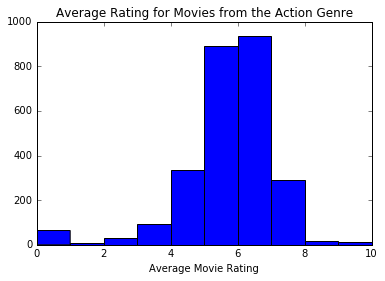

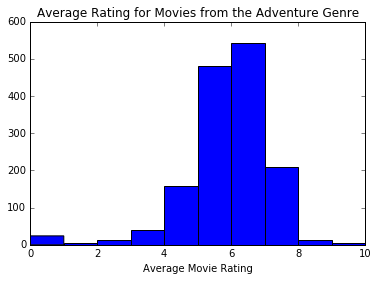

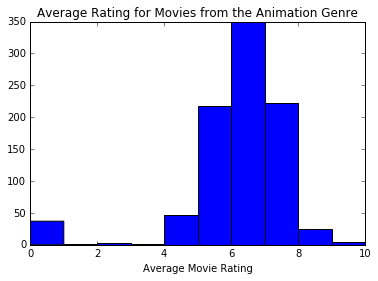

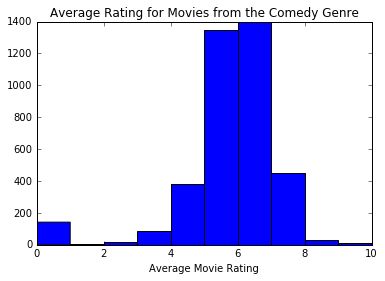

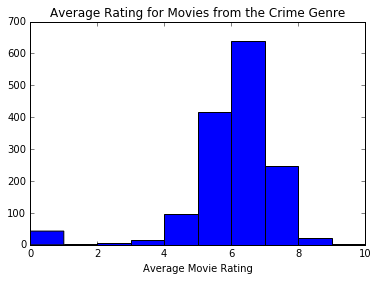

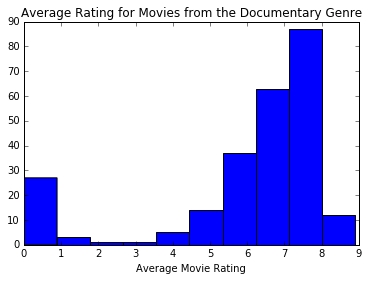

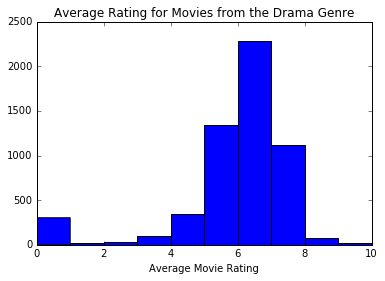

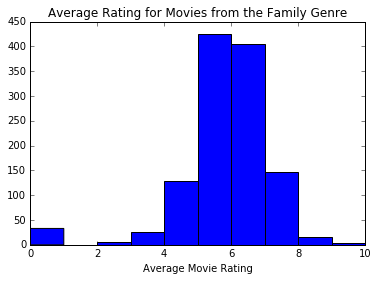

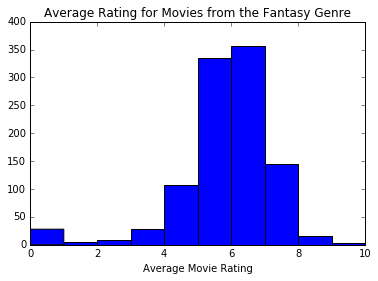

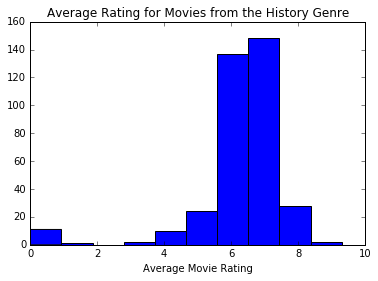

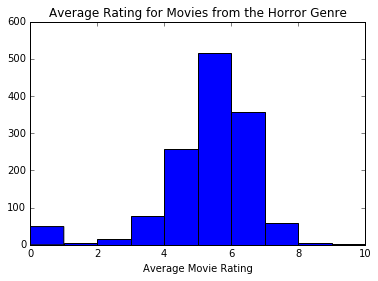

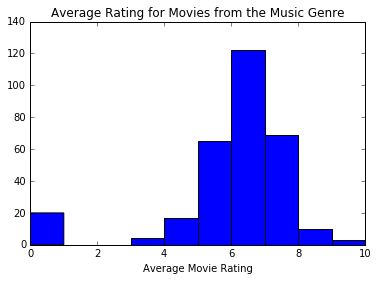

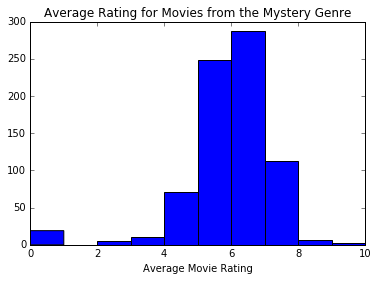

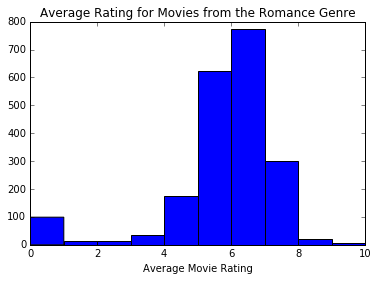

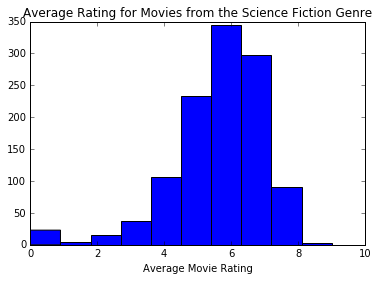

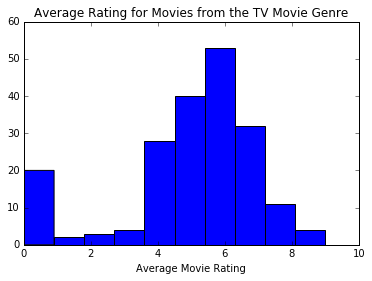

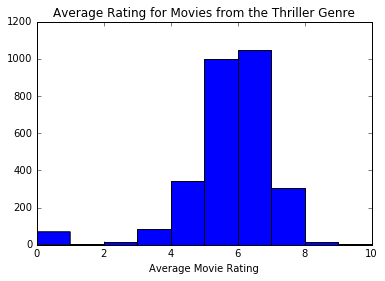

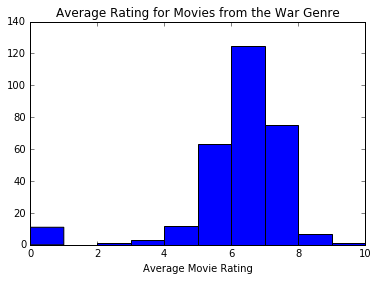

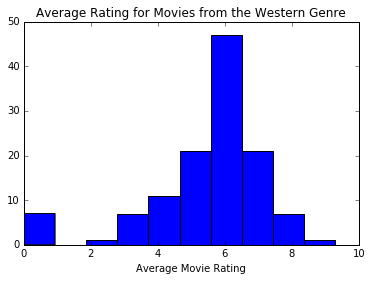

In [11]:
average_rating(movie_df, ids)

Here we can see the distribution of movie ratings based on which genre they are from. Documentaries seem to do very well, if they are in the top 200 most popular movies in that year, but they also have quite a few that are near the 0 mark of the ratings. Other than that, most genres seem to peak around the 6 or 7 point in ratings, which makes sense as these are the averages. Some of the genres, like horror and family seem to get a bit worse with ratings. However, it seems that rating will not be able to tell us too much, unless we factor in other things.

In [12]:
def average_count(movie_df, genre_ids):
    for k in (range(len(genre_ids))):
        genre_rating = []
        for i in range(len(movie_df)):
            genre_int = ast.literal_eval(movie_df['genre_ids'][i])
            for j in range(len(genre_int)):
                if genre_int[j] == genre_ids[k]:
                    genre_rating.append(movie_df['vote_count'][i])
        fig, ax = plt.subplots()
        ax.hist(genre_rating)
        ax.set_title('Vote Count for Movies from the '+str(genres[ids.index(genre_ids[k])])+' Genre')
        ax.set_xlabel('Vote Count')

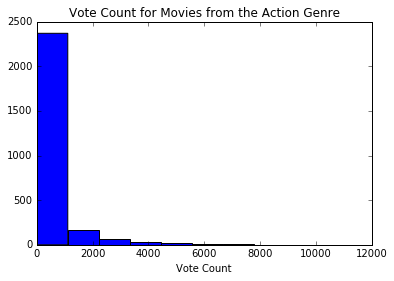

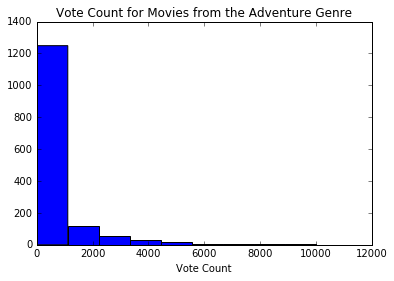

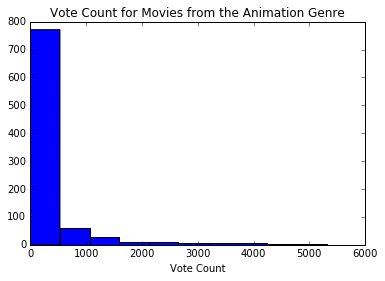

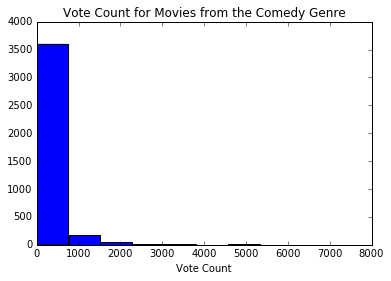

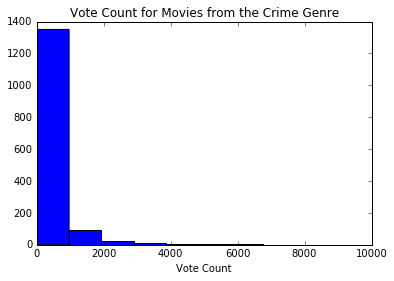

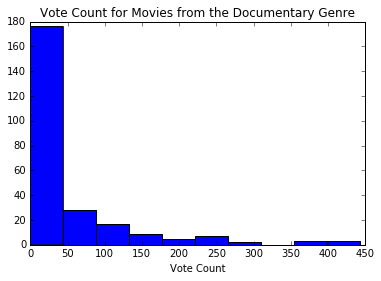

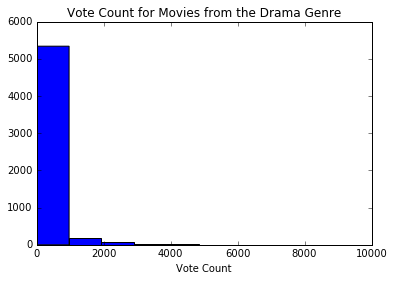

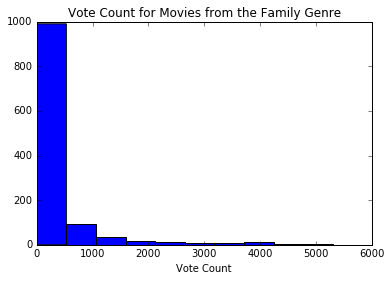

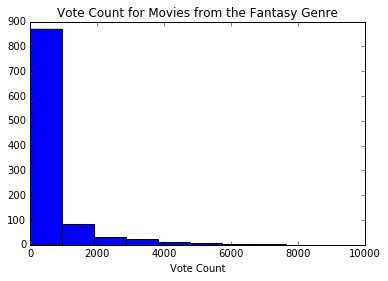

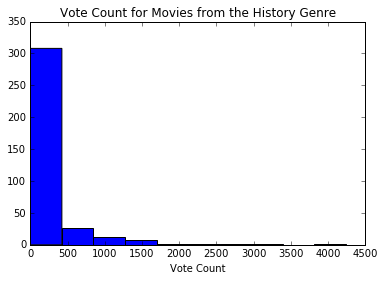

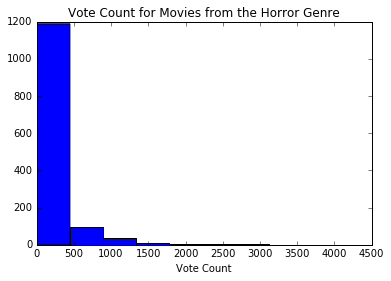

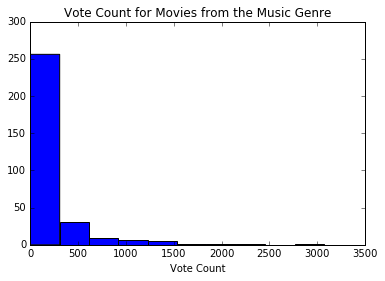

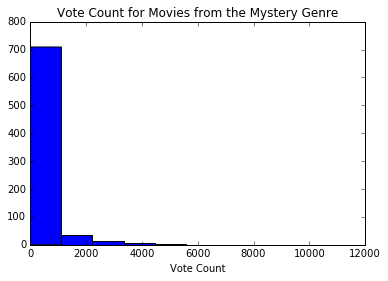

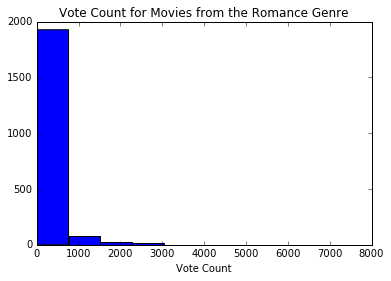

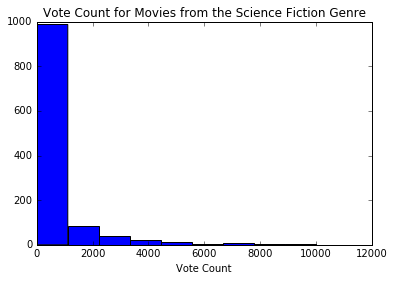

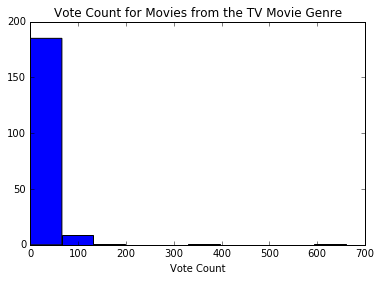

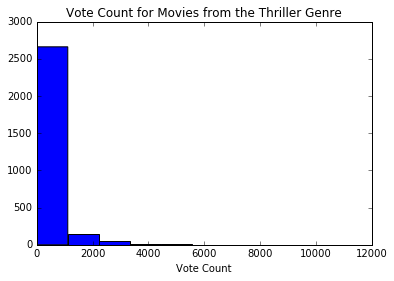

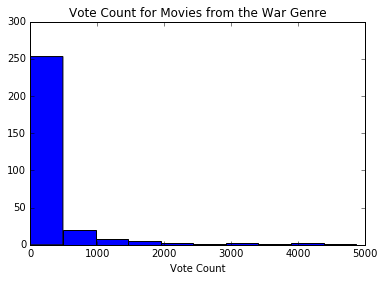

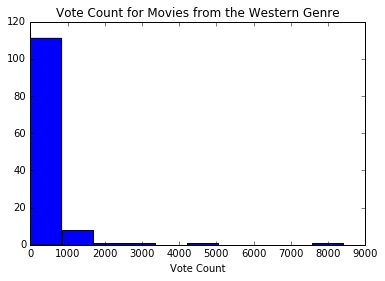

In [14]:
average_count(movie_df, ids)

The idea behind this was to look to see if certain genres ended up getting more votes on this website than others. However, it is hard to really look at this as the data is fairly skewed. Documentaries and TV movies tend to get a lot fewer votes than other genres, but this may just be a factor of their relative popularities (never actually having very popular movies).

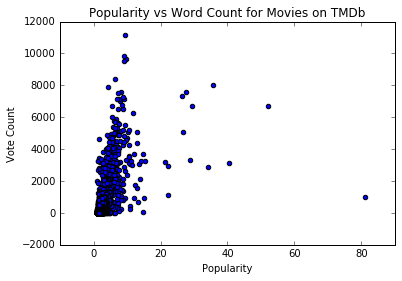

In [53]:
fig, ax = plt.subplots()
ax.scatter(movie_df['popularity'], movie_df['vote_count'])
ax.set_title('Popularity vs Word Count for Movies on TMDb')
ax.set_xlabel('Popularity')
ax.set_ylabel('Vote Count')

The idea here was to get a better view of the popularity value that TMDb uses. Our thinking was that if a movie is more popular, it should have more votes on the website. However, this trend does not seem to hold here. The movie with 80 popularity (Sing) is a movie that was more recently released, so it cannot be fully judged, but there seems to be a very weak correlation between popularity and number of votes.

** Questions **

- Is the length of the movie correlated with its popularity/average rating?
- Are certain genres more popular in certain decades/eras?
- Is this popularity correlated with the number of movies made in this time period (do studios make more movies of a certain genre when that genre is deemed as popular)?
- Does a movie's overview give us any insight into its genre?
- Are there certain combinations of genres that do really well? For instance, does having a movie that is classified as a drama and comedy mean that, on average, you would expect a higher rating than if it was just classified as a drama or comedy? Are multi-genre films more popular?
- How do sequels compare to the original film in terms of popularity/rating? Does that change across genres? What is the likelihood that a film will have a sequel given this data (genre, rating average, popularity)?
- What is the ideal amount of time to have in between sequels? What is the ideal amount of time to have between movie remakes?